# (Loan Data Exploration)
## by (Yaman Jaghbeer)

### Data Source: prosper.com

## Investigation Overview

Did you ever lend someone money and he never paid back?
Frustrating!! Is in it?!

Sure on personal level we mostly talk about small amount.

But did you ever wonder what conditions affect one ability to pay back.

No doubt it is a big topic that touches several aspects!
But here we will look at from **financial** aspect using historic data from a major lender **prosper.com**

And will see if we can point what features helps in paying back!!

## Dataset Overview

The data provided by prosper.com.

After preparing the data for this analysis, we a data set contains:
28,252 loans with 10 variables on each, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and others.
The data cover period from July 2009 to Feb 2014.

In [45]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [46]:
# load in the dataset into a pandas dataframe
prosper_df = pd.read_csv('prosperExtract.csv')

In [47]:
prosper_df.head(10)

,LoanStatus,BorrowerAPR,ProsperRating,LoanOriginalAmount,Term,IsBorrowerHomeowner,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IncomeRange
0,PastDue,0.17969,B,4000,36,False,Employed,1.0,0.18,$25-50k
1,Defaulted,0.35797,HR,4000,36,True,Other,11.0,0.49,$50-75k
2,Defaulted,0.28032,D,2000,36,False,Employed,1.0,0.39,$25-50k
3,Completed,0.30748,E,4000,60,False,Employed,3.0,0.11,$25-50k
4,Completed,0.11296,A,4000,36,True,Employed,1.0,0.26,$75-100k
5,Completed,0.12782,A,10000,36,False,Employed,4.0,0.11,$25-50k
6,Completed,0.08191,AA,16000,36,False,Employed,1.0,0.05,>$100k
7,Defaulted,0.29394,D,2000,36,True,Employed,13.0,0.15,>$100k
8,Completed,0.35843,E,3000,12,False,Employed,6.0,0.28,$50-75k
9,Completed,0.29510,D,4500,36,False,Employed,3.0,0.10,>$100k


## Code Preparation: Function and Variables Definition

Defining functions, variables and standards that will be use frequently.


In [48]:
# a Function tto show percentage above countplots bars.

def show_annot(col,df = prosper_df,displacement = -250, font_color='w' ):
    '''
    show percentage annotation above the bars on a countplot graph
    col: column name

    '''
    # The code below is taken from Udacity.
    # add annotations
    n_points = df.shape[0]
    cat_counts = df[col].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count+displacement, pct_string, ha = 'center', color = font_color)   

In [49]:
def summary(cat_var1,cat_var2,df = prosper_df):
    '''
    for seaborn heatmap: rearrang the count data into 2d matrix that can be used with seaborn heatmap
    Code Source: Udacity
    '''
    ct_counts = df.groupby([cat_var1, cat_var2]).size()
    ct_counts = ct_counts.reset_index(name = 'count')
    ct_counts = ct_counts.pivot(index = cat_var2, columns = cat_var1, values = 'count')
    return ct_counts

In [50]:
plt.rcParams['figure.figsize'] = (10, 7.5) #set default figure size

In [51]:
# This function change figure size
def fsize(a,b):
    plt.figure(figsize=(a,b))

In [52]:
#base_color varaible will be used in several to set the color of the grapgh
base_color = sb.color_palette()[0]

In [53]:
#LoanStatus: creating ordered categoty type for LoanStatus
loan_classes = ['Completed','Defaulted', 'PastDue']
loan_cat =  pd.api.types.CategoricalDtype(ordered=True, categories = loan_classes)
prosper_df['LoanStatus'] = prosper_df['LoanStatus'].astype(loan_cat)

In [54]:
#IncomeRange: creating ordered categoty type for IncomeRange
incomeRange_order = ['$0-25k','$25-50k','$50-75k','$75-100k','>$100k','Not employed','undisclosed']
incomeRange_cat =  pd.api.types.CategoricalDtype(ordered=True, categories = incomeRange_order)
prosper_df['IncomeRange'] = prosper_df['IncomeRange'].astype(incomeRange_cat)

In [55]:
#EmploymentStatus: creating ordered categoty type for EmploymentStatus
employmentstatus_order = ['Employed','Part-time','Self-employed','Retired','Not employed','Other']
employmentstatus_cat =  pd.api.types.CategoricalDtype(ordered=True, categories = employmentstatus_order)
prosper_df['EmploymentStatus'] = prosper_df['EmploymentStatus'].astype(employmentstatus_cat)

## (Loan Status and Borrower AP)

**Loan Status!**  
How many status we have? How the population is distributed between them?

To answer these questions, we will use a standard bar graph the plot the frequencies between different Loan Status.

We have three types of Loans Status:
- Completed (Success, Safe Loan)
- Defaulted (Risky, Bad Loan)
- PastDue (Concerning, Potential to be Defaulted)

We can see from the graph that most of the loans are Completed (70%), around fifth is Defaulted (23%), and the rest is PastDue (7%).

Text(0.5, 1.0, 'Loan Status Distribution')

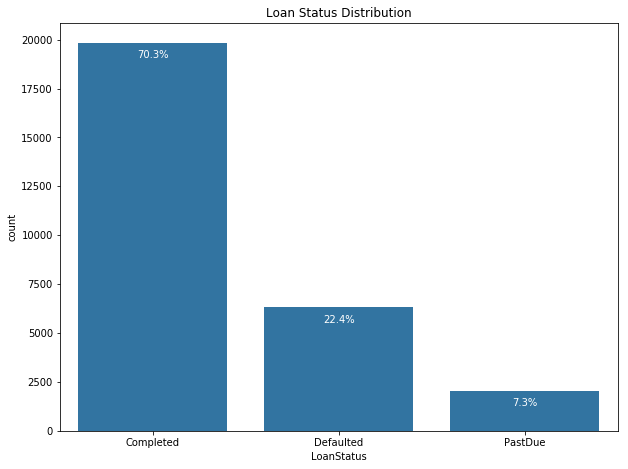

In [56]:
#Loan Status destribution
sb.countplot(data = prosper_df, x = 'LoanStatus',color=base_color)
show_annot('LoanStatus',displacement = -800)
plt.title('Loan Status Distribution')

**Borrower APR!**

Annual Percentage Rate; The actual interest charged on the loan.

How much does it affect the chance of paying back?

APR is one of the main features one look at when borrowing (or lending) money.

To visualize the effect of BorrowerAPR on Loan Status I will use violin plot with inner quartile lines. 

The graph shows after crossing the threshold of APR of 0.3, especially at 0.35, the risk of a loan to default or be delayed is highest. Though borrowers who complete their payments cover all rates, but most of them are below 0.32 APR.

The higher the APR the risker the loan. APR indicates it plays a major role in the difficulty of paying back and hence affecting the Loan Status.


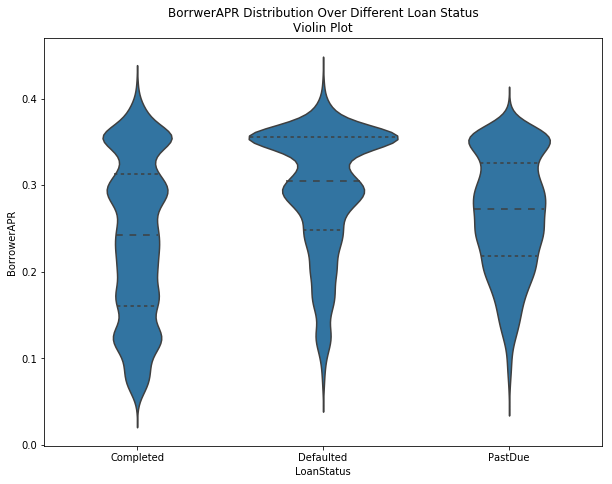

In [57]:
# LoanStatus vs. BorrowerAPR
sb.violinplot(data = prosper_df, x = 'LoanStatus', y = 'BorrowerAPR',
              inner = 'quartile',color = base_color)
plt.title('BorrwerAPR Distribution Over Different Loan Status\nViolin Plot');

**How does the Loan Amount factor in?**

I will explore the loan amount with the APR, and see its effect on the two main loan status (completed and defaulted).

The graph is a scatter plot between Borrower APR and Loan Original Amount (USD), with points have different shapes and color following Loan Status.


Note how the orange squares density increase with higher APRs, this indicated the higher the APR the more chance there is for the Loan Status to default, as the .

Also observe the stacked line of dots accumulating at \\$15,000:
- Below the line: most of the data points are below this line, which indicates that most of the approved loan are less than this amount. 
- Above the line: We found that the completed status rules, indicating the loan status is mostly Completed at all values of available APR at that level.

Text(0, 0.5, 'LoanOriginalAmount (USD)')

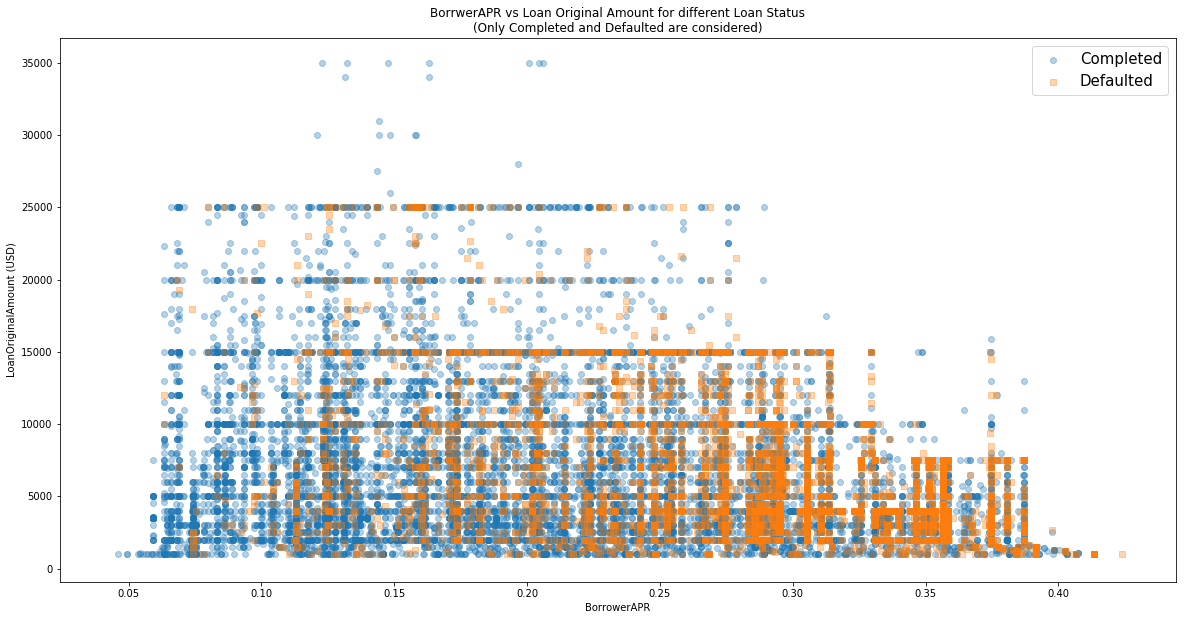

In [58]:
#BorrowerAPR, LoanOriginalAmount, shape: LoanStatus
fsize(20,10)
cat_markers = [['Completed', 'o'],
               ['Defaulted', 's']]

for cat, marker in cat_markers:
    df_cat = prosper_df[prosper_df['LoanStatus'] == cat]
    plt.scatter(data = df_cat, x = 'BorrowerAPR', y = 'LoanOriginalAmount',  marker = marker,alpha=1/3)
plt.legend(['Completed','Defaulted'],prop={'size': 15})

plt.title('BorrwerAPR vs Loan Original Amount for different Loan Status\n(Only Completed and Defaulted\
 are considered)')
plt.xlabel('BorrowerAPR')
plt.ylabel('LoanOriginalAmount (USD)')

## (Loan Status and  Employment)

**Income Range**

Employment is a way to get income.

I will start by using clustered bars to see the distribution of income between different loan statuses.

- From \\$0-25K there is a high risk of defaulting, as the ration between defaulting and completed is around 1:2.
- For \\$25-75 the risk of defaulting is moderate and decreasing with higher income.
- After \\$75k a threshold is crossed. In these high-income ranges > \\$75k, the ratio of people defaulting is small. Low risk.
- Not-employed Income Range: nearly the same number of borrowers are Defaulting compared to the number of Completed. High risk.

In general, the Defaulting chance decrease and the Completed chance increase the higher the income is.


Text(0.5, 0, 'Income Range (USD)')

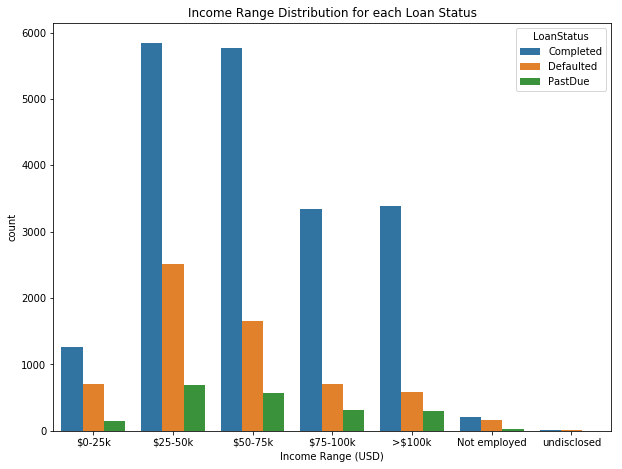

In [59]:
sb.countplot(data = prosper_df, x = 'IncomeRange', hue = 'LoanStatus',
             order = incomeRange_order);
plt.title('Income Range Distribution for each Loan Status')
plt.xlabel('Income Range (USD)')

**Employment Status**

Next I will factor in the employment status.

I will facet each Employment Status and see the Loan Status share for each Income Range.

- For "Employed Status", the conclusion follows the general description of the previous Income Range plot.

- "Part Time" status shows that the high-income population is nearly not present, and for the low range of \\$0-25k, the defaulting ratio is small, but increase on the more common income range of \\$25-50k.

- Looking at  "Self-employed", the risk to default for low compared to all other Employment Status, is the highest. The defaulted ratio is higher in all income levels compared to the last two Employment Status.

- The population of "Retired" is small. The represented population has a very high default chance if their income range is high, which is unexpected. We can see in contrast that the Completed cases in the range \\50-75k is very high. Low income represents nearly a 50-50 chance.

- For the "Not employed" and "other"; the defaulted risk, in total, is the highest, especially when looking at low incomes <\\50k.

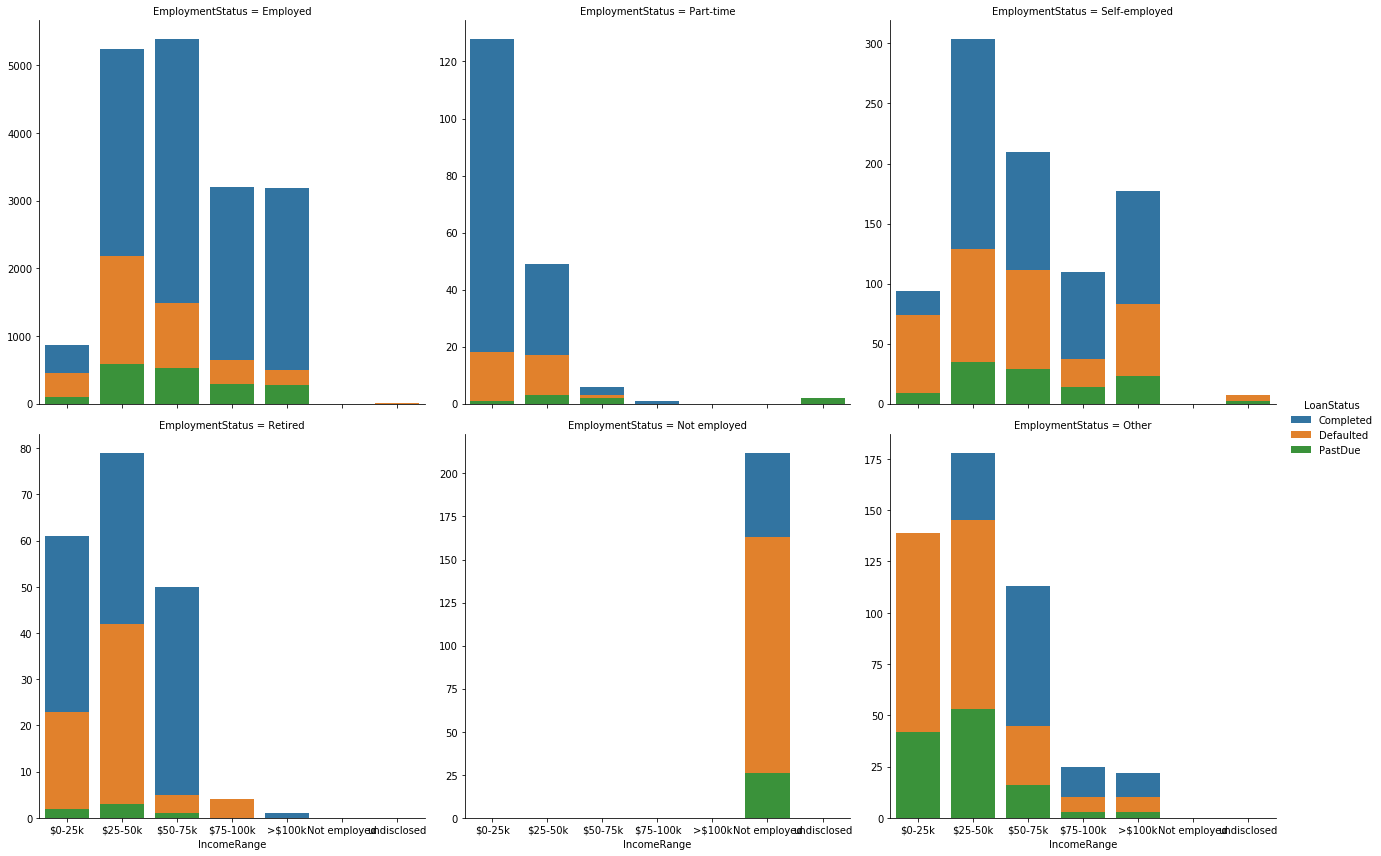

In [60]:
#Loan Status vs. Income Range hue: Employment Status
g = sb.FacetGrid(data = prosper_df, col = 'EmploymentStatus',col_wrap = 3,height=6,
                 sharey=False,hue='LoanStatus')
g.map(sb.countplot,'IncomeRange')
g.add_legend();

## (Conclusion)

The safest loans are the ones with:
- Low APR;
- Where the borrower have a secure source of income that us in mid range.

In short, if you want your money back, don't be greedy, and give to a responsible individual.

